In [2]:
%matplotlib_svg
import numpy as np
import pylab as pl

## IPython Notebook入门

自从IPython 1.0发布以来，越来越多科学家、研究者、教师使用IPython Notebook处理数据、写研究报告、甚至编写书籍。可以使用下面的nbviewer网站查看在网络上公开的Notebook：

> **LINK**

> http://nbviewer.ipython.org/
>
> 通过这个网站可以快速查看网络上任何Notebook的内容

在IPython的官方网站上收集了许多开发者发布的Notebook：

> **LINK**

> https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks

> 许多有趣的Notebook

本节简要介绍IPython Notebook的基本使用方法、魔法命令以及显示系统等方面的内容。

### 基本操作

#### 运行IPython Notebook

使用系统的命令行工具切换到保存Notebook文档的目录，并输入`ipython notebook`命令即可启动Notebook服务器，并通过系统的缺省浏览器打开地址`http://127.0.0.1:8888`。建议读者最好使用Firefox或Chrome浏览Notebook。

本书提供的代码目录`scipybook2`中包含了一个启动Notebook的批处理文件`run_notebook.bat`。运行该批处理文件之后，在浏览器的Notebook列表中依次点击：`01-intro` → `intro-100-ipython.ipynb`就能打开本节对应的Notebook文档。

如`ref:fig-next`所示，Notebook采用浏览器作为界面，首页显示当前路径下的所有Notebook文档和文件夹。点击“New Notebook”按钮或文档名将打开一个新的页面，同时启动一个运算内核进程与其交互。每个打开的Notebook页面都有单独的Python进程与之对应，在Notebook中输入的所有命令都将由浏览器传递到服务器程序再转发到该进程运行。文档的读取和保存工作由服务器进程完成，而运算内核进程则负责运行用户的程序。因此即使用户程序造成运算内核进程异常退出也不会丢失任何用户输入的数据。在关闭服务器进程之前，请确保所有的Notebook都已保存。

![IPython Notebook架构示意图](/files/images/ipython_notebook.png "")

Notebook有自动存档和恢复功能，可通过File → Revert to Checkpoint菜单恢复到以前的版本。此外为了确保安全，打开他人创建的Notebook时，不会运行其中的Javascript程序和显示SVG图像。如果确信来源可靠，可以通过File → Trusted Notebook信任该Notebook。

#### 操作单元

> **SOURCE**

> `notebooks\01-intro\notebook-train.ipynb`：Notebook的操作教程，读者可以使用它练习Notebook的基本操作。

Notebook由多个竖向排列的单元构成，每个单元可以有以下两种样式：

* Code: Code单元中的文本将被作为代码执行，执行代码时按[Shift-Enter]，即同时按下[Shift]和[Enter]按键。

* Markdown: 使用Markdown的格式化文本，可以通过简单的标记表示各种显示格式。

单元的样式可以通过工具栏中的下拉框或者快捷键选择。为了快速操作这些单元格，需要掌握一些快捷键，完整的快捷键列表可以通过菜单Help → Keyboard Shortcuts菜单查看。

Notebook的编辑有两种模式：命令模式，单元编辑模式。在命令模式中，被选中的单元格的边框为灰色。该模式用来对整个单元格进行操作，例如删除、添加、修改格式等。按[Enter]键进入单元编辑模式，边框的颜色变为绿色，并且上方菜单条的右侧会出现铅笔图标，表示目前处于编辑状态。按[Esc]键可返回命令模式。

#### 安装MathJax

编写技术资料少不了输入数学公式，Notebook使用MathJax将输入的LaTeX文本转换成数学公式。由于MathJax库较大，没有集成到IPython中，而是直接从MathJax官网载入，因此如果计算机没有连接网络，就无法正确显示数学公式了。为了解决这个问题，可以在单元中输入如下程序，它将会下载MathJax到本地硬盘。

In [ ]:
from IPython.external.mathjax import install_mathjax, default_dest
install_mathjax()

MathJax完整解压之后，约需100M空间，其中大都是为旧版本的浏览器准备的PNG字体图像文件。执行下面的语句可以快速删除存放PNG字体图片的文件夹：

In [ ]:
from os import path
import shutil

png_path = path.join(default_dest, "fonts/HTML-CSS/TeX/png")
shutil.rmtree(png_path)

运行完上面的命令之后，在命令模式下按[m]键将单元样式切换到Markdown。然后输入如下LaTeX文本：

```$e^{i\pi} + 1 = 0$```

按[Shift-Enter]之后，其内容将转换成数学公式显示：$e^{i\pi} + 1 = 0$。

在本书提供的`scipybook2`下的`settings`目录下已经安装了MathJax，因此无需联网也可以看到数学公式。

#### 操作运算进程

在代码单元中输入的代码都将在运算核进程中的运行环境中执行。当执行某些代码出现问题时，可以通过Kernel菜单中的选项操作该进程：

* Interrupt：中断运行当前的程序，当程序进入死循环时可以通过它中断程序运行。
* Restart：当运算核在扩展模块的程序中进入死循环，无法通过Interrupt菜单中断时，可以通过此选项重新启动运算核进程。

一旦运算核进程被关闭，运行环境中的对象将不复存在，此时可以通过Cell → Run All菜单再次执行所有的单元中的代码。代码将按照从上到下的顺序执行。由于用户在编写Notebook时，可以按照任意的顺序执行单元，因此为了保证能再现运行环境中的所有对象，请记住调整单元的先后顺序。

### 魔法(Magic)命令

IPython提供了许多魔法命令，使得在IPython环境中的操作更加得心应手。魔法命令都以`%`或者`%%`开头，以`%`开头的为行命令，`%%`开头的为单元命令。行命令只对命令所在的行有效，而单元命令则必须出现在单元的第一行，对整个单元的代码进行处理。

执行`%magic`可以查看关于各个命令的说明，而在命令之后添加`?`可以查看该命令的详细说明。此外扩展库可以提供自己的魔法命令，这些命令可以通过`%load_ext`载入。例如`%load_ext cython`载入`%%cython`命令，以该命令开头的单元将调用Cython编译其中的代码。

#### 显示matplotlib图表

matplotlib是Python世界中最著名的绘图扩展库，它支持输出多种格式的图形图像，并且可以使用多种GUI界面库交互式地显示图表。使用`%matplotlib`命令可以将matplotlib的图表直接嵌入到Notebook之中，或者使用指定的界面库显示图表，它有一个参数指定matplotlib图表的显示方式。

在下面的例子中，`inline`表示将图表嵌入到Notebook中。因此最后一行`pl.plot()`所创建的图表将直接显示在该单元之下：

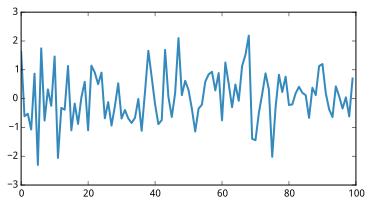

In [39]:
#%nofig
%matplotlib inline
import pylab as pl
pl.seed(1)
data = pl.randn(100)
pl.plot(data);

内嵌图表的输出格式缺省为`PNG`，可以通过`%config`命令修改这个配置。`%config`命令可以配置IPython中的各个可配置对象，其中`InlineBackend`对象为matplotlib输出内嵌图表时所使用的配置，我们配置它的`figure_format="svg"`，这样将内嵌图表的输出格式修改为`SVG`。

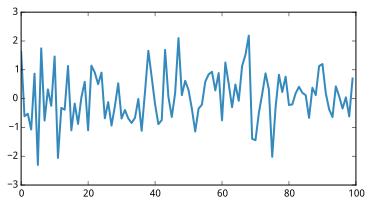

In [40]:
#%nofig
%config InlineBackend.figure_format="svg"
pl.plot(data);

内嵌图表很适合制作图文并茂的Notebook，然而它们是静态的无法进行交互。可以将图表输出模式修改为使用GUI界面库，下面的`qt4`表示使用QT4界面库显示图表。请读者根据自己系统的配置，选择合适的界面库：`gtk, osx, qt, qt4, tk, wx`。

执行下面的语句将弹出一个窗口显示图表，可以通过鼠标和键盘与此图表交互。请注意该功能只能在运行IPython Kernel的机器上显示图表。

In [ ]:
%matplotlib qt4
pl.plot(data);

#### 性能分析

性能分析对编写处理大量数据的程序非常重要，特别是Python这样的动态语言，一条语句可能会执行很多内容，有的是动态的，有的调用扩展库。不做性能分析，就无法对程序进行优化。IPython提供了许多性能分析的魔法命令。

`%timeit`调用`timeit`模块对单行语句重复执行多次，计算出其执行时间。下面的代码测试修改列表单个元素所需的时间。

In [20]:
a = [1,2,3]
%timeit a[1] = 10

10000000 loops, best of 3: 69.3 ns per loop


`%%timeit`则用于测试整个单元中代码的执行时间。下面的代码测试空列表中循环添加10个元素所需的时间：

In [21]:
%%timeit
a = []
for i in range(10):
    a.append(i)

1000000 loops, best of 3: 1.82 µs per loop


`timeit`命令会重复执行代码多次，而`time`则只执行一次代码，输出代码的执行情况，和`timeit`命令一样，它可以作为行命令和单元命令。下面的代码统计往空列表中添加10万个元素所需的时间。

In [22]:
%%time
a = []
for i in range(100000):
    a.append(i)

Wall time: 18 ms


`time`和`timeit`命令都将信息使用`print`输出，如果希望用程序分析这些信息，可以使用`%%capture`命令，将单元格的输出保存为一个对象。下面的程序对不同长度的列表调用`random.shuffle()`打乱顺序，用`%time`记录下`shuffle()`的运行时间：

In [23]:
%%capture time_results
import random
for n in [1000, 5000, 10000, 50000, 100000, 500000]:
    print "n={0}".format(n)
    alist = range(n)
    %time random.shuffle(alist)

`time_results.stdout`属性中保存通过标准输出管道中的输出信息：

In [24]:
print((time_results.stdout))

n=1000
Wall time: 1 ms
n=5000
Wall time: 5 ms
n=10000
Wall time: 10 ms
n=50000
Wall time: 40 ms
n=100000
Wall time: 62 ms
n=500000
Wall time: 400 ms



如果调用`%timeit`命令时添加`-o`参数，则它返回一个表示运行时间信息的对象。下面的程序对不同长度的列表调用`sorted()`排序，并使用`%timeit`命令统计排序所需的时间：

In [25]:
timeit_results = []
for n in [5000, 10000, 20000, 40000, 80000, 160000, 320000]:
    alist = [random.random() for i in xrange(n)]
    res = %timeit -o sorted(alist)
    timeit_results.append((n, res))

1000 loops, best of 3: 1.56 ms per loop
100 loops, best of 3: 3.32 ms per loop
100 loops, best of 3: 7.57 ms per loop
100 loops, best of 3: 16.4 ms per loop
10 loops, best of 3: 35.8 ms per loop
10 loops, best of 3: 81 ms per loop
10 loops, best of 3: 185 ms per loop


`ref:fig-next`显示了排序的耗时结果。横坐标为对数坐标轴，表示数组的长度；纵坐标为平均每个元素所需的排序时间。可以看出每个元素所需的平均排序时间与数组的长度的对数成正比，因此可以计算出排序函数`sorted()`的时间复杂度为：$O(n \log{n})$。

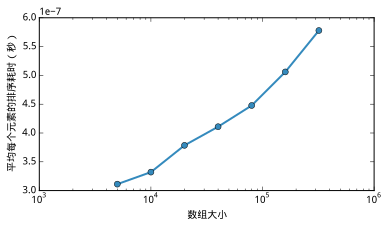

In [26]:
#%figonly=`sorted()`函数的时间复杂度
array_lengths = np.array([res[0] for res in timeit_results])
exec_times = np.array([res[1].best for res in timeit_results])
pl.semilogx(array_lengths, exec_times / array_lengths, "-o")
pl.xlabel("数组大小")
pl.ylabel("平均每个元素的排序耗时（秒）");

`%%prun`命令调用`profile`模块，对单元中的代码进行性能剖析。下面的性能剖析显示`fib()`运行了21891次，而`fib_fast()`则只运行了20次。

In [27]:
%%nopage
%%prun
def fib(n):
    if n < 2:
        return 1
    else:
        return fib(n-1) + fib(n-2)
    
def fib_fast(n, a=1, b=1):
    if n == 1:
        return b
    else:
        return fib_fast(n-1, b, a+b)

fib(20)
fib_fast(20)

         21913 function calls (4 primitive calls) in 0.007 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  21891/1    0.007    0.000    0.007    0.007 <string>:2(fib)
     20/1    0.000    0.000    0.000    0.000 <string>:8(fib_fast)
        1    0.000    0.000    0.007    0.007 <string>:2(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
 

#### 代码调试

`%debug`命令用于调试代码，它有两种用法。一种是在执行代码之前设置断点进行调试，第二种则是在代码抛出异常之后，执行`%debug`命令查看调用堆栈。下面先演示第二种用法：

In [28]:
import math

def sinc(x):
    return math.sin(x) / x

[sinc(x) for x in range(5)]

ZeroDivisionError: float division by zero

上面的程序抛出了`ZeroDivisionError`异常，下面用`%debug`查看调用堆栈。在调试模式下可以使用`pdb`模块提供的调试命令，例如用`p x`显示变量`x`的值。

In [29]:
%debug

> <ipython-input-28-9b69eaad97fe>(4)sinc()
      3 def sinc(x):
----> 4     return math.sin(x) / x
      5 

ipdb> p x
0
ipdb> q


还可以先设置断点，然后运行程序。但是`%debug`的断点需要指定文件名和行号，使用起来并不是太方便。本书提供了`%%func_debug`单元命令，可以通过它指定中断运行的函数。在下面的例子中，程序将在`numpy.unique()`的第一行中断运行，然后通过输入`n`命令单步运行程序，最后输入`c`继续运行。

In [5]:
%%func_debug np.unique

np.unique([1, 2, 5, 4, 2])

Breakpoint 1 at c:\winpython-32bit-2.7.9.2\python-2.7.9\lib\site-packages\numpy\lib\arraysetops.py:96
NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> c:\winpython-32bit-2.7.9.2\python-2.7.9\lib\site-packages\numpy\lib\arraysetops.py(173)unique()
    172     """
--> 173     ar = np.asanyarray(ar).flatten()
    174 

ipdb> n
> c:\winpython-32bit-2.7.9.2\python-2.7.9\lib\site-packages\numpy\lib\arraysetops.py(175)unique()
    174 
--> 175     optional_indices = return_index or return_inverse
    176     optional_returns = optional_indices or return_counts

ipdb> c


#### 自定义的魔法命令 

> **SOURCE**

> `scpy2.utils.nbmagics`：该模块中定义了本书提供的魔法命令，如果读者使用本书提供的批处理运行Notebook，则该模块已经载入。`notebooks\01-intro\scpy2-magics.ipynb`是这些魔法命令的使用说明。

IPython提供了很方便的自定义魔法命令的方法。最简单的方法就是使用`register_line_magic`和`register_cell_magic`装饰器将函数转换为魔法命令。下面的例子中使用`register_line_magic`定义了一个行魔法命令`%find`，它在指定的对象中搜索与目标匹配的属性名。

In [1]:
from IPython.core.magic import register_line_magic

@register_line_magic
def find(line):
    from IPython.core.getipython import get_ipython
    from fnmatch import fnmatch
    
    items = line.split() #❶
    patterns, target = items[:-1], items[-1]
    ipython = get_ipython() #❷
    names = dir(ipython.ev(target)) #❸
    
    results = []
    for pattern in patterns:
        for name in names:
            if fnmatch(name, pattern):
                results.append(name)
    return results

当调用`%find`行魔法命令时，魔法命令后面的所有内容都传递给`line`参数。❶按照空格对`line`分割，除最后一个元素之外，其余的元素都做为搜索模板。而最后一个参数则为搜索的目标。

❷通过`get_ipython()`函数获得表示IPython运算核的对象，通过该对象可以操作运算核。❸调用运算核的`ev()`方法对表达式`target`求值得到实际的对象，并用`dir()`获取该对象的所有属性名。

最后使用`fnmatch`模块对搜索模板和属性名进行匹配，将匹配结果保存到`results`并返回。下面使用`%find`命令在`numpy`模块中搜索所有以`array`开头，或者包含`mul`的属性名：

In [1]:
import numpy as np
names = %find array* *mul* np
%col 4 names

['array',                'array2string',         'array_equal',          'array_equiv',         
 'array_repr',           'array_split',          'array_str',            'matmul',              
 'multiply',             'polymul',              'ravel_multi_index']   


下面的例子使用`register_cell_magic`注册`%%cut`单元命令。在调试代码时，我们经常会添加`print`语句输出中间结果。但如果输出的字符串太多，会导致浏览器的速度变慢甚至失去响应。此时可以使用`%%cut`限制程序输出的行数和字符数。

`cut()`函数有两个参数`line`和`cell`，其中`line`为单元第一行中除魔法命令之外的字符串，而`cell`为除了单元中第一行之外的所有字符串。`line`通常为魔法命令的参数，而`cell`则为需要执行的代码。IPython提供了基于装饰器的参数分析函数。下面的例子中使用`argument()`声明了两个参数`-l`和`-c`分别指定最大行数和最大字符数。它们的缺省值分别为100和10000。

In [8]:
from IPython.core.magic import register_cell_magic
from IPython.core.magic_arguments import argument, magic_arguments, parse_argstring

@magic_arguments()
@argument('-l', '--lines', help='max lines', type=int, default=100)
@argument('-c', '--chars', help='max chars', type=int, default=10000)
@register_cell_magic
def cut(line, cell):
    from IPython.core.getipython import get_ipython
    from sys import stdout
    args = parse_argstring(cut, line) #❶
    max_lines = args.lines
    max_chars = args.chars
    
    counters = dict(chars=0, lines=0)
    
    def write(string):
        counters["lines"] += string.count("\n")
        counters["chars"] += len(string)

        if counters["lines"] >= max_lines:
            raise IOError("Too many lines")
        elif counters["chars"] >= max_chars:
            raise IOError("Too many characters")
        else:
            old_write(string)
            
    try:
        old_write, stdout.write = stdout.write, write  #❷
        ipython = get_ipython()
        ipython.run_cell(cell) #❸
    finally:
        del stdout.write  #❹

❶调用`parse_argstring()`分析行参数，它的第一个参数是使用`argument`装饰器修饰过的魔法命令函数，第二个参数为行命令字符串。❷在调用单元代码之前，将`stdout.write()`替换为限制输出行数和字符数的`write()`函数。❸然后调用运算核对象的`run_cell()`运行单元代码。❹运行完毕之后将`stdout.write()`删除，恢复到原始状态。

下面是使用`%%cut`限制输出行数的例子：

In [2]:
%%cut -l 5
for i in range(10000):
    print(("I am line", i))

I am line 0
I am line 1
I am line 2
I am line 3
I am line 4

OSError: Too many lines

### Notebook的显示系统

若单元中代码的最后一行没有缩进，并且不以分号结尾，则在单元的输出栏中显示运行该代码所得到对象。此外运算核的标准输出被重定向到单元的输出框中，因此可以使用`print`语句输出任何信息。例如在下面的程序中，使用循环进行累加计算，在循环体中使用`print`输出中间结果。而最后一行的运算结果就是变量`s`的值。

In [4]:
s = 0
for i in range(4):
    s += i
    print(("i={}, s={}".format(i, s)))
s

i=0, s=0
i=1, s=1
i=2, s=3
i=3, s=6


6

#### `display`模块

由于Notebook采用浏览器作为界面，因此除了可以显示文本之外，还可以显示图像、动画、HTML等多种形式的数据。有关显示方面的功能均在`IPython.display`模块中定义。其中提供了如下的对象用于显示各种格式的数据：

|    类名       |                       说明                        |
|:------------:|:-------------------------------------------------|
|   `Audio`    | 将二进制数据、文件或者网址显示为播放声音的控件           |
|   `FileLink` | 将文件路径显示为一个超链接 |
|   `FileLinks` | 将文件夹路径显示为一组超链接 |
|   `HTML`    | 将字符串、文件或者网址显示为HTML |
|   `Image`   | 将表示图像的二进制字符串、文件或者网址显示为图像 |
|   `Javascript` | 将字符串作为Javascript代码在浏览器中运行 |
|   `Latex` | 将字符串作为LaTeX代码显示，主要用于显示数学公式 |
|   `SVG`  | 将字符串、文件或网址显示为SVG图形 |

当对单元中程序的最后一行求值得到上述类型的对象时，将在单元的输出栏中显示为其对应的格式。或者可以使用`display`模块中的`display()`函数在程序中输出这些对象。下面的程序使用`Latex`对象输出了3个数学公式，其中前两个使用`display()`输出，而由于最后一行的求值结果为`Latex()`对象，它也会被显示为数学公式。

In [3]:
from IPython import display

for i in range(2, 4):
    display.display(display.Latex("$x^{i} + y^{i}$".format(i=i)))
display.Latex("$x^4 + y^4$")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

`Image`对象可以用于显示图像，当用`url`参数时，它会从指定的网址获取图像，并显示在Notebook中。如果`embed`参数为`True`，则图像的数据将直接嵌入到Notebook之中，这样此后打开此Notebook时，即使没有联网也可以显示该图像。

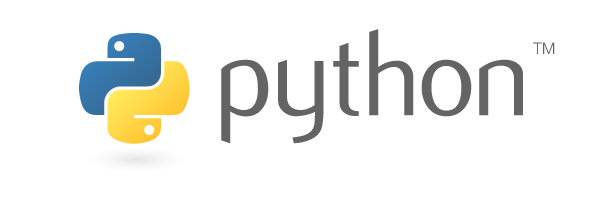

In [4]:
#%nofig
logourl = "https://www.python.org/static/community_logos/python-logo-master-v3-TM.png"
display.Image(url=logourl, embed=True)

在后续的章节中经常会将NumPy数组显示为图像，这时可以使用matplotlib中提供的函数将数组转换成PNG图像的字符串，然后通过`Image`将图像数据嵌入到Notebook中。下面的`as_png()`使用matplotlib中的`imsave()`将数组转换成PNG图像数据。

In [5]:
def as_png(img, **kw):
    "将数组转换成PNG格式的字符串数据"
    import io
    from matplotlib import image
    from IPython import display
    buf = io.BytesIO()
    image.imsave(buf, img, **kw)
    return buf.getvalue()

下面的程序通过公式$\sin(x^{2} + 2 \cdot y^{2} + x \cdot y)$生成二维数组`z`，并调用`as_png()`将其转换为字符串`png`，并查看该字符串的头10个字节，可以看出该字符串就是PNG图像文件中的数据。最后使用`Image()`将该字符串使用PNG图像显示。其结果如`ref:fig-next`（左）所示。

'\x89PNG\r\n\x1a\n\x00\x00'


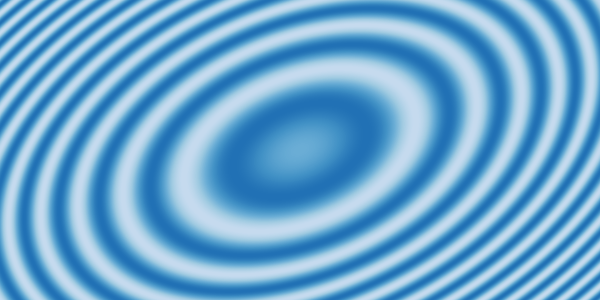

In [6]:
#%fig[1x2]=使用`as_png()`将数组显示为PNG图像（左）、将`as_png()`注册为数组的显示格式（右）
import numpy as np
y, x = np.mgrid[-3:3:300j, -6:6:600j]
z = np.sin(x**2 + 2*y**2 + x*y)
png = as_png(z, cmap="Blues", vmin=-2, vmax=2)
print((repr(png[:10])))
display.Image(png)

#### 自定义对象的显示格式

有两种方式可以自定义对象在Notebook中的显示格式：

1. 给类添加相应的显示方法。
2. 为类注册相应的显示函数。

当我们自己编写类的代码时，使用第一种方法最为便捷。和Python的`__str__()`方法类似，只需要定义`_repr_*_()`等方法即可，这里的`*`可以是`html`、`svg`、`javascript`、`latex`、`png`等格式的名称。

在下面的例子中，`Color`类中定义了两个`IPython`用的显示方法：`_repr_html_()`和`_repr_png_()`，它们分别使用HTML和PNG图像显示颜色信息。

In [7]:
class Color(object):
    
    def __init__(self, r, g, b):
        self.rgb = r, g, b
        
    def html_color(self):
        return '#{:02x}{:02x}{:02x}'.format(*self.rgb)
    
    def invert(self):
        r, g, b = self.rgb
        return Color(255-r, 255-g, 255-b)
    
    def _repr_html_(self):
        color = self.html_color()
        inv_color = self.invert().html_color()
        template = '<span style="background-color:{c};color:{ic};padding:5px;">{c}</span>'
        return template.format(c=color, ic=inv_color)
    
    def _repr_png_(self):
        img = np.empty((50, 50, 3), dtype=np.uint8)
        img[:,:,:] = self.rgb
        return as_png(img)

下面创建`Color`对象，并直接查看它，IPython会自动选择最合适的显示格式。由于Notebook是基于HTML的，HTML格式的优先级别最高，因此查看`Color`对象时，`_repr_html_()`方法将被调用：

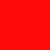

In [8]:
#%hide_output
c = Color(255, 10, 10)
c

为了使用其它格式显示对象，可以调用`display.display_*()`函数，这里调用`display_png()`将`Color`对象转换成一个PNG图像显示：

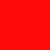

In [9]:
#%nofig
display.display_png(c)

每种输出格式都对应一个`Formatter`对象，它们被保存在`DisplayFormatter`对象的`formatters`字典中，下面是获取该字典中PNG格式所对应的`Formatter`对象：

In [10]:
shell = get_ipython()
png_formatter = shell.display_formatter.formatters['image/png']

调用`Formatter.for_type_by_name()`可以为该输出格式添加指定的格式显示函数，其前两个参数分别为模块名和类名。由于使用字符串指定类，因此添加格式显示函数时不需要载入目标类。下面的代码为NumPy的数组添加显示函数`as_png()`。

In [11]:
png_formatter.for_type_by_name("numpy", "ndarray", as_png)

下面查看前面创建的数组`z`，它将以图像的形式呈现，其结果如`ref:fig-next`（右）所示。

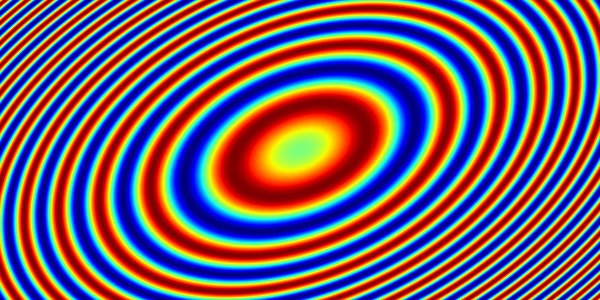

In [12]:
z

如果目标类已经被载入时，可以使用`for_type()`方法为其添加格式显示函数。下面的代码将表示分数的`Fraction`类使用LaTeX的数学公式显示：

In [13]:
from fractions import Fraction
latex_formatter = shell.display_formatter.formatters["text/latex"]
def fraction_formatter(obj):
    return '$$\\frac{%d}{%d}$$' % (obj.numerator, obj.denominator)
latex_formatter.for_type(Fraction, fraction_formatter)
Fraction(3, 4) ** 4 / 3

Fraction(27, 256)

### 定制IPython Notebook

虽然IPython只提供了最基本的编辑、运行Notebook的功能，但是它具有丰富的可定制性，用户可以根据自己的需要打造出独特的Notebook开发环境。如`ref:fig-prev3`所示，IPython Notebook系统由浏览器、服务器和运算核三个部分组成。IPython分别提供了这三个部分的定制方法。

#### 用户配置（profile）

每次启动IPython时都会从指定的用户配置（profile）文件夹下读取配置信息。下面的代码输出当前的用户配置文件夹的路径：该路径由`HOME`环境变量、`.ipython`和`profile_配置名`构成。

> **TIP**

> 在本书提供的运行IPython Notebook的批处理文件中配置了`HOME`环境变量，因此能将配置文件夹和Notebook文件一起打包。

In [22]:
import os
ipython = get_ipython()
print(("HOME环境变量:", os.environ["HOME"]))
print(("IPython配置文件夹:", ipython.ipython_dir))
print(("当前的用户配置文件夹:", ipython.config.ProfileDir.location))

HOME环境变量: C:\Users\RY\Dropbox\scipybook2\settings
IPython配置文件夹: C:\Users\RY\Dropbox\scipybook2\settings\.ipython
当前的用户配置文件夹: C:\Users\RY\Dropbox\scipybook2\settings\.ipython\profile_scipybook2


可以在命令行中输入如下命令创建新的用户配置：

    ipython profile create test


修改用户配置文件夹之下的配置文件之后，在启动Notebook时通过`--profile`参数指定所采用的用户配置：

    ipython notebook --profile test

#### 服务器扩展和Notebook扩展插件

在`.ipython`文件夹之下还有两个子文件夹`extensions`和`nbextensions`分别用于保存服务器和浏览器的扩展程序。

* `extensions`：存放用Python编写的服务器扩展程序
* `nbextensions`：存放Notebook客户端的扩展程序，通常为Javascript和CSS样式表文件

Notebook的服务器基于tornado服务器框架开发，因此编写服务器的扩展程序需要了解tornado框架，而开发Notebook客户端（浏览器的界面部分）的扩展程序则需要了解HTML、Javascript和CSS样式表等方面的内容。这些内容与本书的主题无关，就不再详细叙述了。下面看看如何安装他人开发的扩展程序。

> **LINK**

> https://github.com/ipython-contrib/IPython-notebook-extensions/wiki/config-extension

> 安装IPython扩展程序的说明


首先执行下面的语句安装Notebook客户端的扩展程序，`user`参数为`True`表示将扩展安装在`HOME`环境变量路径之下的`.ipython`文件夹之中。

In [23]:
%%disabled
import IPython.html.nbextensions as nb
ext= 'https://github.com/ipython-contrib/IPython-notebook-extensions/archive/3.x.zip'
nb.install_nbextension(ext, user=True)

上面的程序将在`nbextensions`文件夹下创建`IPython-notebook-extensions-3.x`文件夹，其中包含了许多客户端扩展程序。接下来按照如下的步骤完成安装：

* 将`nbextensions\IPython-notebook-extensions-3.x\config`移动到`nbextensions`之下。
* 将`nbextensions\config\nbextensions.py`移动到`extensions`文件夹之下。
* 在`.ipython`之下创建`templates`文件夹。
* 将`nbextensions\config\nbextensions.html`移动到`templates`文件夹之下。
* 将`nbextensions\config\ipython_notebook_config.py`中的代码添加进`profile_default\ipython_notebook_config.py`。
* 访问`http://localhost:8888/nbextensions/`，在该页面中可以管理`nbextensions`文件夹下安装的客户端扩展程序。

当Notebook服务器启动时，会运行用户配置（profile）文件夹之下的`ipython_notebook_config.py`文件，并使用其中的配置。

下面是`ipython_notebook_config.py`中的配置代码。❶首先将`extensions`文件夹添加进Python的模块搜索路径之下。因此该路径之下的`nbextensions.py`文件可以通过`import nbextensions`载入。❷指定服务器扩展程序的模块名，由于之前添加了搜索路径，因此Python可以直接通过模块名`'nbextensions'`找到其对应的文件`nbextensions.py`。❸将`templates`文件夹添加进服务器扩展程序的网页模板的搜索路径，让服务器可以找到`nbextensions.html`文件。

In [25]:
%%disabled
from IPython.utils.path import get_ipython_dir
import os
import sys

ipythondir = get_ipython_dir()
extensions = os.path.join(ipythondir,'extensions') 
sys.path.append( extensions ) #❶

c = get_config()
c.NotebookApp.server_extensions = [ 'nbextensions'] #❷
c.NotebookApp.extra_template_paths = [os.path.join(ipythondir,'templates')] #❸

`nbextensions`扩展程序为服务器添加了一个新的URL：`http://localhost:8888/nbextensions/`，通过该路径可以开启或禁止指定的客户端扩展程序。`nbextensions`扩展程序通过递归搜索`nbextensions`文件夹下的YAML文件识别客户端扩展程序，`IPython-notebook-extensions-3.x`目录下只有部分扩展程序附带了YAML文件，读者可以仿照这些文件为其它的扩展程序添加相应的YAML文件，这样就可以通过`nbextensions`页面管理扩展程序了。

#### 添加新的运算核

由于执行用户代码的运算核与Notebook服务器是独立的进程，因此不同的Notebook可以使用不同版本的Python甚至是其它语言的运算核。IPython的下一个版本将改名为Jupyter，其目标是创建一个通用的科学计算的开发环境，支持Julia、Python和R等在数据处理领域流行的语言。下面以Python3-64bit为例介绍如何添加新的运算核。

首先从WinPython的网址下载`WinPython-64bit-3.4.3.3.exe`，并安装在C盘根目录之下。然后运行下面的代码创建运算核配置文件：

In [37]:
import os
from os import path
import json

ipython = get_ipython()
kernels_folder = path.join(ipython.ipython_dir, "kernels")
if not path.exists(kernels_folder):
    os.mkdir(kernels_folder)
    
python3_path = "C:\\WinPython-64bit-3.4.3.3\\scripts\\python.bat"

kernel_settings = {
 "argv": [python3_path, 
          "-m", "IPython.kernel", "-f", "{connection_file}"],
 "display_name": "Python3-64bit",
 "language": "python"
}

kernel_folder = path.join(kernels_folder, kernel_settings["display_name"])
if not path.exists(kernel_folder):
    os.mkdir(kernel_folder)
    
kernel_fn = path.join(kernel_folder, "kernel.json")

with open(kernel_fn, "w") as f:
    json.dump(kernel_settings, f, indent=4)

上面的代码创建`.ipython\kernels\python3-64bit\kernel.json`文件，它是一个JSON格式的字典，其中`"argv"`键为运算核的启动命令，`"display_name"`为运算核的显示名称，`"language"`为运算核的语言。

刷新Notebook的索引页面之后，可以在“New”下拉菜单中找到“Python3-64bit”的选项，点其它将打开一个以Python3 64bit解释器为运算核的Notebook页面。在Notebook页面中也可以使用“Kernel”菜单更改当前的运算核。运算核的配置保存在Notebook文件之中，因此下一次开启该Notebook时，将自动使用最后一次选择的运算核。

感兴趣的读者可以试试添加更多的运算核，笔者在Windows系统下成功地安装了PyPy、Julia、R、NodeJS等运算核。